# EDA and ETL for scraped data from IPM and AskExtension data knowledge

In [9]:
'''
['exoticPests.json',
 'fruitItems_new.json',
 'fruitVeggieEnvironItems_new.json',
 'ipmdata_new.json',
 'pestDiseaseItems_new.json',
 'plantFlowerItems.json',
 'turfPests.json',
 'veggieItems_new.json',
 'weedItems.json']
'''
_PATH = '../data/uc-ipm/updated/'
DATA_FILE_NAMES = sorted(os.listdir(_PATH))

In [70]:
import pandas as pd

import json
import os

import matplotlib.pyplot as plt

COLOR = 'white'
plt.rcParams['text.color']      = COLOR
plt.rcParams['text.color']      = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color']     = COLOR
plt.rcParams['ytick.color']     = COLOR

## IPM Data

In [72]:
FILE_NAME = 'ipmdata_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 214 non-null    object
 1   urlPestNote          214 non-null    object
 2   descriptionPestNote  214 non-null    object
 3   life_cycle           214 non-null    object
 4   damagePestNote       214 non-null    object
 5   managementPestNote   214 non-null    object
 6   imagePestNote        214 non-null    object
 7   tablePestNote        214 non-null    object
 8   urlQuickTip          214 non-null    object
 9   contentQuickTips     214 non-null    object
 10  imageQuickTips       214 non-null    object
 11  video                214 non-null    object
dtypes: object(12)
memory usage: 20.2+ KB


In [73]:
df.sample(5)

,name,urlPestNote,descriptionPestNote,life_cycle,damagePestNote,managementPestNote,imagePestNote,tablePestNote,urlQuickTip,contentQuickTips,imageQuickTips,video
158,Conenose Bugs,http://ipm.ucanr.edu/PMG/PESTNOTES/pn7455.html...,Conenose bugs are members of the family Reduvi...,The adult western bloodsucking conenose is 1/2...,"Conenose bug bites usually occur at night, and...",Various measures can be taken to prevent probl...,[{'caption': 'Adult western bloodsucking conen...,[],,,[],[]
107,Lyme Disease in California,http://ipm.ucanr.edu/PMG/PESTNOTES/pn7485.html...,"Lyme disease is a potentially serious disease,...",There are two major families of ticks: the slo...,Lyme Disease Signs and Symptoms Lyme disease b...,Preventing exposure to ticks is the best way t...,[{'caption': 'The causal agent of Lyme disease...,[],,,[],[]
108,Thrips,http://ipm.ucanr.edu/PMG/PESTNOTES/pn7429.html...,"Thrips, order Thysanoptera, are tiny, slender ...","Most adult thrips are elongate, slender, minut...","Thrips feeding on plants can damage fruit, lea...",Thrips are difficult to control. If management...,[{'caption': 'Stippling as result of greenhous...,"[<table cellpadding=""2"" style=""width: 100%; ma...",http://ipm.ucanr.edu/QT/thripscard.html?src=ex...,"When thrips feed, they distort or scar leaves,...",[{'link': 'http://ipm.ucanr.edu/PMG/F/I-TS-FOC...,[{'videoLink': 'https://www.youtube.com/watch?...
27,Biological Control and Natural Enemies of Inve...,http://ipm.ucanr.edu/PMG/PESTNOTES/pn74140.htm...,Biological control is the beneficial action of...,,,,[{'caption': 'Adult convergent lady beetle fee...,"[<table class=""indextable"">\n <caption>...",,,[],[]
182,Garden Chemicals: Safe Use & Disposal,,,,,,[],[],http://ipm.ucanr.edu/QT/gardenchemicalscard.ht...,"Pesticides (insecticides, herbicides, fungicid...",[{'link': 'http://ipm.ucanr.edu/PMG/F/M-PE-FAD...,[]


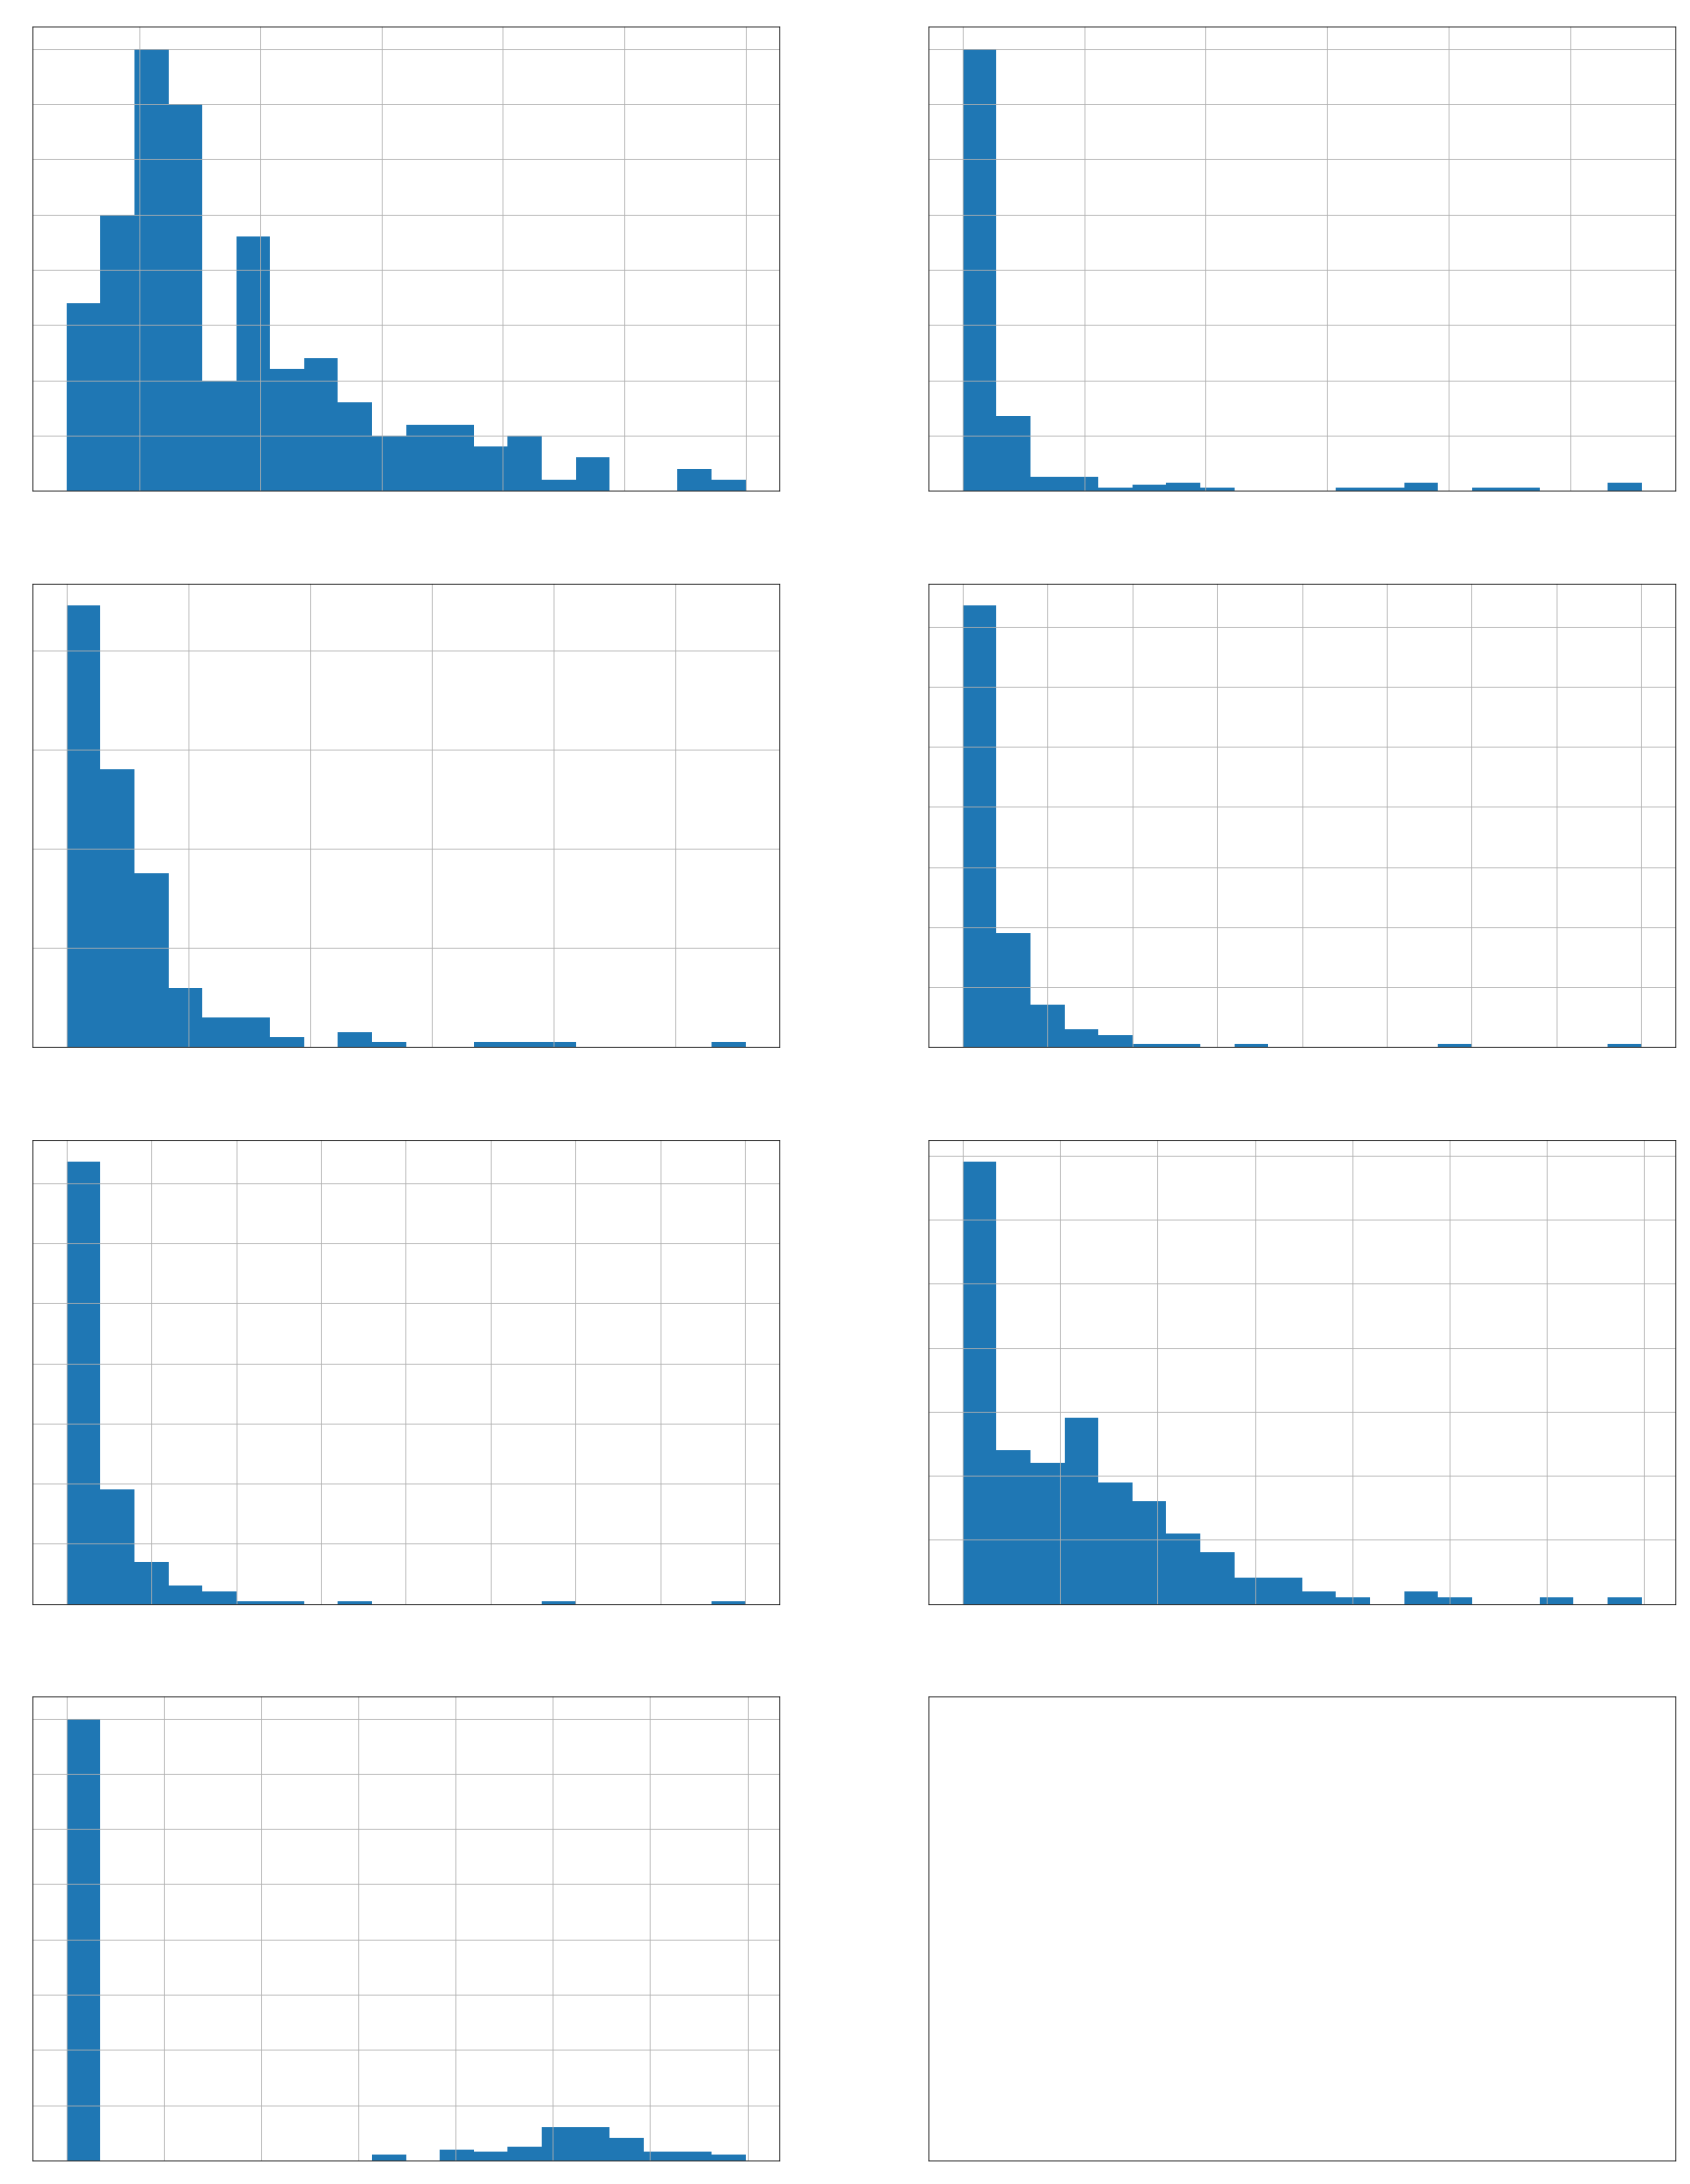

In [74]:
text_columns = ['name', 'descriptionPestNote', 'life_cycle', 'damagePestNote', 'damagePestNote', 'managementPestNote', 'contentQuickTips']
fig, axes = plt.subplots(4, 2, figsize = (30, 40))
for i, col in enumerate(text_columns):
    r = i//2
    c = i%2
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Description of columns

Columns:
- `name`
    - Name of the pest
    - __inject__ into ES, create __embedding__
- `urlPestNote`
    - URL of the pest
    - __inject__ into ES
- `descriptionPestNote`
    - Description of the pest
    - __inject__ into ES, create __embedding__
    - can be used to match by __DESCRIPTION__
- `life_cycle`
    - Desciption of the life-cycle of the pest
    - __inject__ into ES, create __embedding__
    - can be used to match by __DESCRIPTION__
- `damagePestNote`
    - Description of the damage caused by this pest
    - __inject__ into ES, create __embedding__
    - can be used to match by __DAMAGE__
- `managementPestNote`
    - Some notes on how to control and fight against this pest
    - __inject__ into ES, create __embedding__
- `imagePestNote`
    - Some images regarding the pest
    - __discard__ for moment
- `tablePestNote`
    - Table information on pest
    - __discard__ for moment
- `urlQuickTip`
    - Links to some additional information on the pests
    - __discard__ for moment
- `contentQuickTips`
    - Additional information on the pest
    - __discard__ for moment
- `imageQuickTips`
    - Some addiotinal links to images related to pests (similar to `imagePestNote`)
    - __discard__ for moment
- `video`
    - Links to video related to pests
    - __discard__ for moment

## Fruit items

In [77]:
FILE_NAME = 'fruitItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 15 non-null     object
 1   url                  15 non-null     object
 2   cultural_tips        14 non-null     object
 3   pests_and_disorders  15 non-null     object
dtypes: object(4)
memory usage: 608.0+ bytes


In [ ]:
df.sample(5)

,name,url,cultural_tips,pests_and_disorders
13,Almonds,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/almonds....,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Ants', 'link': 'http://ipm.ucanr..."
8,Plums and Prunes,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/plumspru...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
7,Pears,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/pears.ht...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
2,Cherries,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/cherries...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Spotted wing drosophila', 'link'..."
6,Blackberries and Raspberries,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/blackber...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Spotted wing drosophila', 'link'..."


In [97]:
print('CULTURAL_TIPS field')
print(json.dumps(df['cultural_tips'][0], indent=4, sort_keys=True))

print('PESTS_AND_DISORDERS field')
print(json.dumps(df['pests_and_disorders'][0], indent=4, sort_keys=True))


CULTURAL_TIPS field
[
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/ENVIRON/depbrkcanfert.html?src=exchbt",
        "tip": "Fertilizing"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/almondfirst.html?src=exchbt",
        "tip": "First-year pruning"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/walnutharvet.html?src=exchbt",
        "tip": "Harvesting and storage"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/walnutplanting.html?src=exchbt",
        "tip": "Planting"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/ENVIRON/walnutpruning.html?src=exchbt",
        "tip": "Pruning"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/sanitation.html?src=exchbt",
        "tip": "Sanitation"
    },
    {
        "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/almondsite.html?src=exchbt",
        "tip": "Site selection"
    },
    {
   

### TODO
- Create separate field with __fertilizing__ keywords
- Create separate field with __problems__ keywords

## Veggie Items

In [99]:
FILE_NAME = 'veggieItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 31 non-null     object
 1   url                  31 non-null     object
 2   description          31 non-null     object
 3   tips                 31 non-null     object
 4   images               31 non-null     object
 5   pests_and_disorders  31 non-null     object
dtypes: object(6)
memory usage: 1.6+ KB


In [100]:
df.sample(5)

,name,url,description,tips,images,pests_and_disorders
19,Potato,http://ipm.ucanr.edu/home-and-landscape/potato...,The edible and harvested parts of a potato pla...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/C/S-PO-CUL...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
8,Asparagus,http://ipm.ucanr.edu/home-and-landscape/aspara...,Asparagus is a perennial vegetable with edible...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/M-AG-SCE...,"[{'problem': 'Asparagus beetles', 'link': 'htt..."
18,Watermelon,http://ipm.ucanr.edu/home-and-landscape/waterm...,Watermelons require a fairly large space to gr...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/S-CU-SCE...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
14,Turnip,http://ipm.ucanr.edu/home-and-landscape/turnip...,Turnips are a root vegetable in the same famil...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/M-AG-SCE...,"[{'problem': 'Beet armyworm', 'link': 'http://..."
29,Cucumber,http://ipm.ucanr.edu/home-and-landscape/cucumb...,Cucumber varieties are typically grouped into ...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/S-CU-SCE...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca..."


In [3]:
def docs_etl():
    """Read all docs and pre-process them"""
    print("ETL for docs...")

    df_docs_json = {}
    for data_file_name in DATA_FILE_NAMES:
        path_data = f"{_PATH}{data_file_name}"
        df_docs_json[data_file_name] = pd.read_json(path_data)

        if "name" in df_docs_json[data_file_name].columns:
            before_shape = df_docs_json[data_file_name].shape
            df_docs_json[data_file_name] = df_docs_json[data_file_name].drop_duplicates(
                "name"
            )
            after_shape = df_docs_json[data_file_name].shape
            num_dropped = before_shape[0] - after_shape[0]
            if num_dropped > 0:
                print(f"Dropped {num_dropped} with same 'name' in {data_file_name}")

    
    df_docs_json = unique_column_names(df_docs_json)

    df_docs = concat_docs(df_docs_json)

    df_docs.index = df_docs.index.set_names("doc_id")

    df_docs = replace_nan(df_docs)

    return df_docs

def unique_column_names(df_docs_json):
    """Column names must be unique and identify the file they came from"""

    df_docs_json["pestDiseaseItems_new.json"] = df_docs_json[
        "pestDiseaseItems_new.json"
    ].rename(
        columns={
            "url": "urlPestDiseaseItems",
            "description": "descriptionPestDiseaseItems",
            "identification": "identificationPestDiseaseItems",
            "life_cycle": "life_cyclePestDiseaseItems",
            "damage": "damagePestDiseaseItems",
            "solutions": "solutionsPestDiseaseItems",
            "images": "imagesPestDiseaseItems",
        }
    )

    df_docs_json["turfPests.json"] = df_docs_json[
        "turfPests.json"
    ].rename(
        columns={
            "url": "urlTurfPests",
            "text": "textTurfPests",
            "images": "imagesTurfPests",
        }
    )

    df_docs_json["weedItems.json"] = df_docs_json[
        "weedItems.json"
    ].rename(
        columns={
            "url": "urlWeedItems",
            "description": "descriptionWeedItems",
            "images": "imagesWeedItems",
        }
    )

    df_docs_json["exoticPests.json"] = df_docs_json[
        "exoticPests.json"
    ].rename(
        columns={
            "url": "urlExoticPests",
            "description": "descriptionExoticPests",
            "damage": "damageExoticPests",
            "identification": "identificationExoticPests",
            "life_cycle": "life_cycleExoticPests",
            "monitoring": "monitoringExoticPests",
            "management": "managementExoticPests",
            "related_links": "related_linksExoticPests",
        }
    )

    df_docs_json["askextensiondata-california.json"] = df_docs_json[
        "askextensiondata-california.json"
    ].rename(
        columns={
            "faq-id": "ask_faq_id",
            "url": "ask_url",
            "title": "ask_title",
            "title-question": "ask_title_question",
            "created": "ask_created",
            "updated": "ask_updated",
            "state": "ask_state",
            "county": "ask_county",
            "question": "ask_question",
            "answer": "ask_answer",
            "attachments": "ask_attachments",
        }
    )

    return df_docs_json

def concat_docs(df_docs_json):
    """Concatenate the docs of different json files into one big dataframe"""
    df_docs = pd.concat(
        [df_docs_json[name] for name in DATA_FILE_NAMES], ignore_index=True
    )
    return df_docs


def replace_nan(df_docs):
    """Replace all NaN values in the dataframe with appropriate content"""
    df_docs = df_docs.fillna("")
    # nested types & arrays require an empty list if non existing
    for column in [
        "imagePestNote",
        "imageQuickTips",
        "video",
        "imagesPestDiseaseItems",
        "other_headersPestDiseaseItems",
        "imagesTurfPests",
        "imagesWeedItems",
        "related_linksExoticPests",
        "imagesExoticPests",
        "ask_answer",
        "ask_attachments",
    ]:
        df_docs[column] = [[] if x == "" else x for x in df_docs[column]]

    return df_docs


docs_etl()

ETL for docs...


NameError: name 'DATA_FILE_NAMES' is not defined